In [4]:
import websocket, json, time, numpy, talib
import pandas as pd
import threading
from tkinter import *

In [5]:
cc = "ethusdt"
interval = "1m"
SOCKET =f'wss://stream.binance.com:9443/ws/{cc}@kline_{interval}'

RSI_PERIOD = 4
RSI_OVERBOUGHT = 70
RSI_OVERSOLD = 30

closes = []
in_position = False

In [6]:
window = Tk()
window.title("tkinter GUI")
window.geometry('500x500')

def tkinterText(txt):
    label = Label(window,text=txt)
    label.pack()
    
def on_close(ws):
    print('closed connection')

def on_message(ws, message):
    global in_position
    json_message = json.loads(message)
    candle = json_message['k']
    is_candle_closed = candle['x']
    date = pd.to_datetime(candle['t'], unit='ms')
    open1 = candle['o']
    close = candle['c']
    high = candle['h']
    low = candle['l']
    if is_candle_closed:
        tkinterText((f"Date:{date}, Open:{open1}, Close:{close}, High:{high}, Low:{low}"))
        closes.append(float(close))
        if len(closes) > RSI_PERIOD:
            np_closes = numpy.array(closes)
            rsi = talib.RSI(np_closes, RSI_PERIOD)
            last_rsi = rsi[-1]
            tkinterText(f"RSI:{last_rsi}")
            if last_rsi > RSI_OVERBOUGHT:
                if in_position:
                    tkinterText("Overbought! Sell! Sell! Sell!")
                    in_position = False
                else:
                    tkinterText("It is overbought, but we don't own any. Nothing to do.")
            if last_rsi < RSI_OVERSOLD:
                if in_position:
                    tkinterText("It is oversold, but you already own it, nothing to do.")
                else:
                    tkinterText("Oversold! Buy! Buy! Buy!")
                    in_position = True

def connect_to_socket():
    ws = websocket.WebSocketApp(SOCKET, on_message = on_message, on_close = on_close)
    ws.run_forever()
    
t = threading.Thread(target=connect_to_socket)
t.start()

window.mainloop()

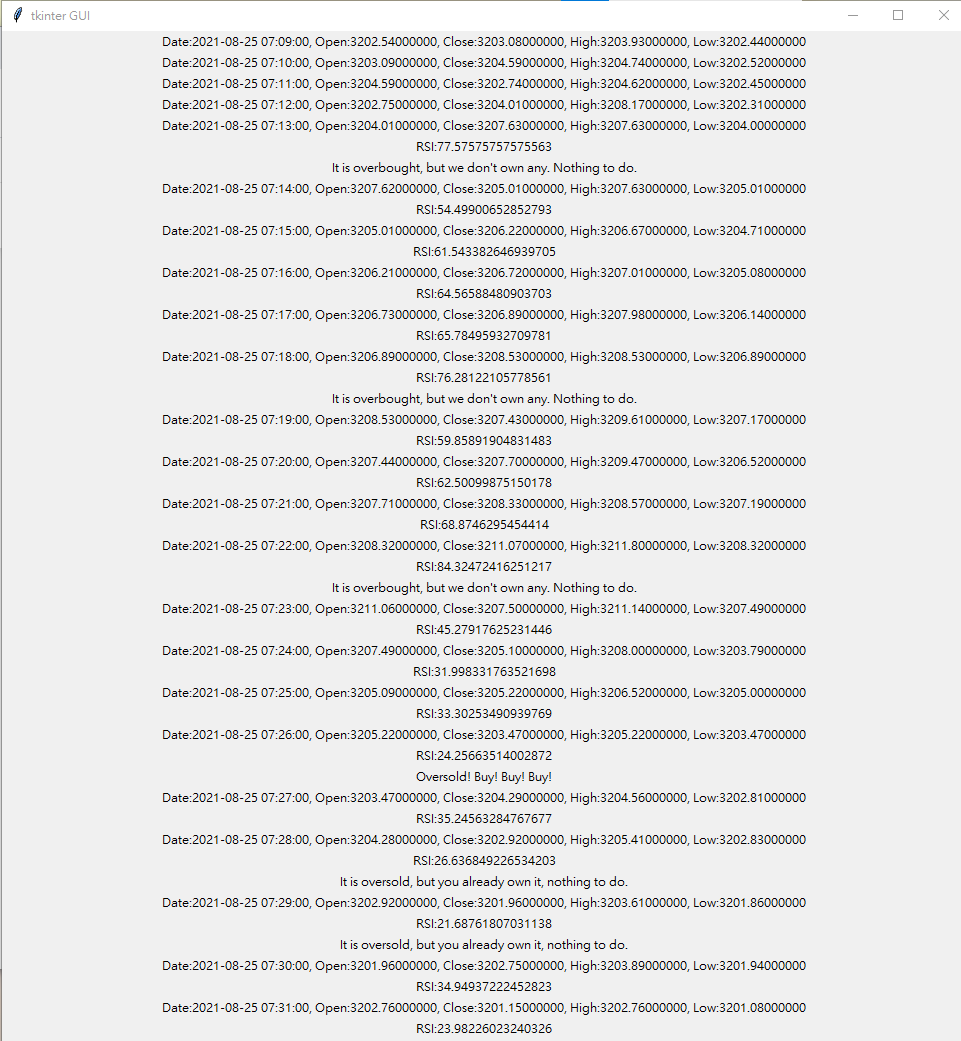